# NBA Free Throws - Analysis of Outside Factors

This is an analysis of free throws in the NBA.

The data consists of every free throw taken from the 2006-2016 NBA seasons.

618,019 free throws in total.

Formal:

Making a free throw should be a simple task for the best basketball players in the world, right?

For most players in the NBA, this is generally the case, with the league average free throw percentage sitting just above 75%.

Some players, however, have a serious struggle with the shot, sometimes even [famously](https://en.wikipedia.org/wiki/Hack-a-Shaq).

Overall, there's quite a significant discrepency of free throw accuracy between NBA players, with the best percentage of the 2018-2019 season being .928, held by Malcolm Brogdon, and the lowest being .449, achieved by Hassan Whiteside. (basketball-reference.com - out of players with at least 200 free throws in the season).

The point of all this babbling is that a made free throw is highly dependent on individual player skill.

But are there other factors that can affect a free throw shot during a game, such as time left, game importance or even the current game score?

__Are these factors significant enough to show free throw trends that transcend individual player skill?__

The specific questions I will be addressing in this report in order to come to a conclusion are:
1. Do players shoot free throws better or worse in playoff games?
2. Do players shoot better in certain quarters of the game?
3. How well do players generally shoot in clutch time (defined later)?

To answer these questions I will be analyzing a dataset of every free throw taken in the NBA from 2006 to 2016, which consists of 610,019 free throws in chronological order, the players who took them, the teams that were playing, the end results of the games, whether the games were playoff or regular season, and the current period, time and score of the game at the time of the shot.

For the main part of my analysis I will be ignoring the player who is shooting and instead be analyzing all other circumstances surrounding each shot.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
df = pd.read_csv('free_throws.csv', engine='python')
#print(df)

In [4]:
#pie chart maker. most common chart used in report
labels = ['Made', 'Missed']
colors = ['green', 'red']
explode = [0, 0.1]
def makepie(data, title):
    plt.pie(data.value_counts(), autopct='%1.1f%%', labels=labels, colors=colors, explode=explode)
    plt.title(title)

# Dataframe Preview

In [6]:
df[:6]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18
5,106 - 114,PHX - LAL,261031013.0,1.0,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2006 - 2007,1,3:15


# Shots by Player

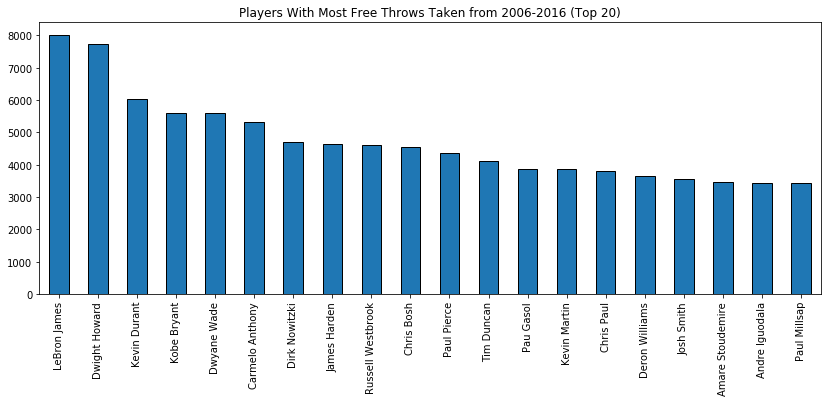

In [5]:
players = df['player']

#PLAYERS - TOTAL SHOTS
players.value_counts().head(20).plot(kind='bar', figsize=(14,5), edgecolor='black', linewidth=1, title='Players With Most Free Throws Taken from 2006-2016 (Top 20)')

While it's true that better players get fouled more and thus take more free throws, which could sway the data, the best players in the NBA are not necessarily the best free throw shooters.

In fact, the top two players on this list, LeBron James and Dwight Howard, both shoot them below the average, at 73.6% and 56.7% respectively. (basketball-reference.com)

# Total Free Throw %

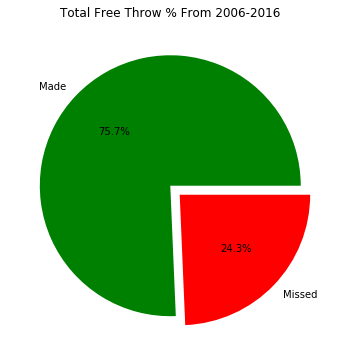

In [6]:
shots_made = df['shot_made']

#PIE CHART - TOTAL FT%
plt.figure(figsize=(10,6))

makepie(shots_made, 'Total Free Throw % From 2006-2016')

plt.show()

As I mentioned before, the average NBA free throw percentage sits just above 75%

Let's see how averages are affected based on a variety of circumstances.

# Free Throw % in Playoffs vs Regular Season

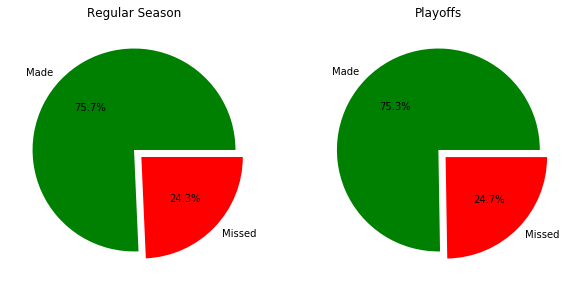

In [7]:
#2 PIE CHARTS - FT% PLAYOFFS vs FT% REGULAR SEASON
playoff_games = df[df['playoffs'] == 'playoffs']
regular_games = df[df['playoffs'] != 'playoffs']

shots_made_p = playoff_games['shot_made']
shots_made_r = regular_games['shot_made']

#PLOT
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
makepie(shots_made_r, 'Regular Season')

plt.subplot(1, 2, 2)
makepie(shots_made_p, 'Playoffs')

#plt.tight_layout()

plt.show()

We can see that there's a difference of .4% between regular season and playoff shooting, but is this a significant difference or the result of a smaller playoff sample size?

Let's find out...

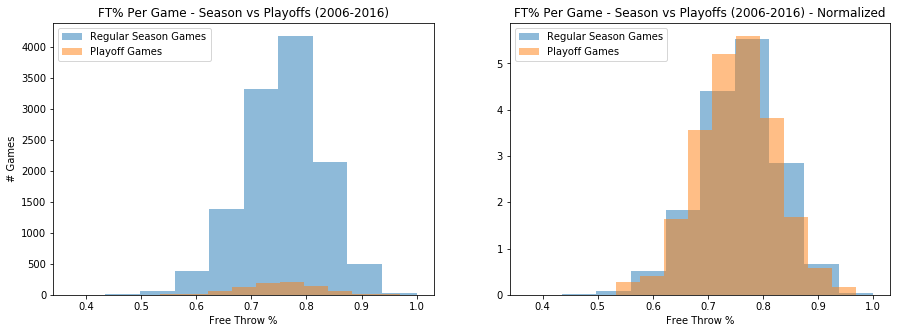

In [8]:
#seperate playoff/regular datasets
dfp = df[df['playoffs'] == 'playoffs']
dfr = df[df['playoffs'] == 'regular']

#group by game
playoff_games = dfp.groupby('game_id')
regular_games = dfr.groupby('game_id')

#get avg FT% per game
playoff_game_avg = playoff_games['shot_made'].agg(np.mean)
regular_game_avg = regular_games['shot_made'].agg(np.mean)

#PLOT
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(regular_game_avg, alpha=0.5, label='Regular Season Games')
plt.hist(playoff_game_avg, alpha=0.5, label='Playoff Games') 
plt.legend(loc = 'upper left')
plt.title('FT% Per Game - Season vs Playoffs (2006-2016)')
plt.xlabel('Free Throw %')
plt.ylabel('# Games')

plt.subplot(1, 2, 2)
plt.hist(regular_game_avg, alpha=0.5, label='Regular Season Games', density=True)
plt.hist(playoff_game_avg, alpha=0.5, label='Playoff Games', density=True) 
plt.legend(loc = 'upper left')
plt.title('FT% Per Game - Season vs Playoffs (2006-2016) - Normalized')
plt.xlabel('Free Throw %')

plt.show()

Here I compared the distribution of free throw percentages per geme of regular season games and playoff games. 

After normalizing the plots, the two distributions seem similar upon an eye-test.

By performing a T-test on the distributions we can further determine whether the .4% total shooting difference is significant.

In [9]:
ttest_ind(regular_game_avg, playoff_game_avg, equal_var=False)

Ttest_indResult(statistic=1.718867005932505, pvalue=0.08596099554908057)

The low T-value and relatively high P-value here indicates that there is NOT a significant difference in playoff free throw shooting compared to the regular season.

# Free Throw % Per Quarter

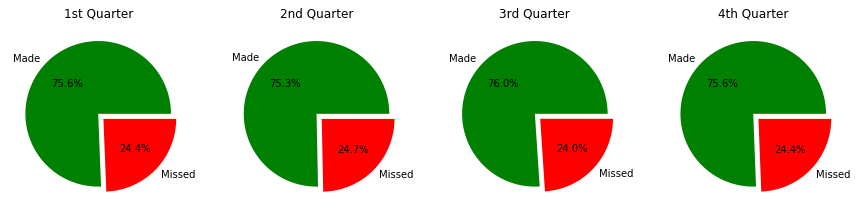

In [10]:
#FT% in each quarter
q1 = df[df['period'] == 1]
q2 = df[df['period'] == 2]
q3 = df[df['period'] == 3]
q4 = df[df['period'] == 4]

shots_made_q1 = q1['shot_made']
shots_made_q2 = q2['shot_made']
shots_made_q3 = q3['shot_made']
shots_made_q4 = q4['shot_made']

#PLOT
plt.figure(figsize=(15,5))

plt.subplot(1, 4, 1)
makepie(shots_made_q1, '1st Quarter')

plt.subplot(1, 4, 2)
makepie(shots_made_q2, '2nd Quarter')

plt.subplot(1, 4, 3)
makepie(shots_made_q3, '3rd Quarter')

plt.subplot(1, 4, 4)
makepie(shots_made_q4, '4th Quarter')

While there is only small differences between free throw percentage in each quarter, it is interesting to note that the 3rd quarter is the most significant outlier, yielding the highest percentage. This may be worth further investigation.

For my next and final analysis, I'll be taking a look at free throws taken during clutch time.
In the NBA, "clutch time" is defined as the "last five minuts of any game in which two teams are seperated by five points or less" (deadspin.com).

It's no secret that some players perform in the clutch while others crack under pressure. Let's find out if the former or the latter is more common.

# Free Throw % in Clutch Time

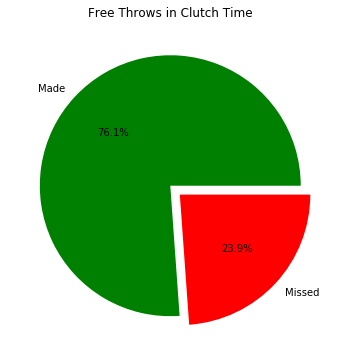

In [11]:
#FT% in CLUTCH TIME

#define clutch
def clutch(d):
    if ((abs(d['score_2'] - d['score_1']) <= 5) & (int(d['period']) >= 4) & (d['time_mins'] <= 4)):
        return 1
    else:
        return 0
    
    
#CONVERT 'time' COLUMN FOR USE WITH CONDITIONALS

#make copy of dataframe to leave original intact
df2 = df

#trim seconds off times
time_mins = [time[:-3] for time in time]

#convert time strings into ints
time_mins = list(map(int, time_mins))

#add time_mins column to df2
df2['time_mins'] = time_mins


#ISOLATE CLOSE GAMES (within 5 points)

#create two new columns representing both teams' scores respectively
df2['score_1'] = df2['score'].apply(lambda x: int(x.split("-")[0]))
df2['score_2'] = df2['score'].apply(lambda x: int(x.split("-")[1]))

#add binary 'clutch' game column
df2['clutch'] = df2.apply(clutch, axis=1)
clutch_shots = df2[df2['clutch'] == 1]
shots_made_c = clutch_shots['shot_made']

#PLOT
plt.figure(figsize=(10,6))
makepie(shots_made_c, 'Free Throws in Clutch Time')
plt.show()

It seems that players generally perform at or above average in clutch time.

Just for fun, let's take a look at how well players shoot free throws in clutch time of playoff games. That must be maximum pressure, right?

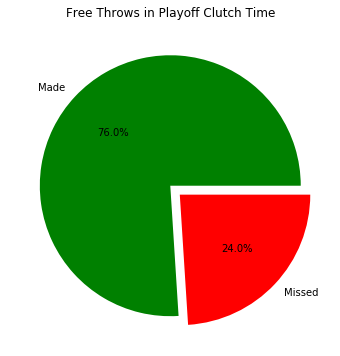

In [12]:
#define extra_clutch
def clutch_p(d):
    if ((abs(d['score_2'] - d['score_1']) <= 5) & (int(d['period']) >= 4) & (d['time_mins'] <= 4) & (d['playoffs'] == 'playoffs')):
        return 1
    else:
        return 0
    
df2['clutch_p'] = df2.apply(clutch_p, axis=1)
clutch_shots_p = df2[df2['clutch_p'] == 1]
shots_made_c_p = clutch_shots_p['shot_made']

#PLOT
plt.figure(figsize=(10,6))
makepie(shots_made_c_p, 'Free Throws in Playoff Clutch Time')
plt.show()

Hmm... Seems about the same.

# Further Research

In my opinion, there was not enough evidence to conclude that clutch time or playoff games affect players' free throw shots.
However, it was interesting to see that players made the highest percentage of free throws in the 3rd quarter of games. One theory I have is that:
1. This is the beginning of the second half, so the game is getting more serious, thus players will take their free throws more seriously
2. Players are also coming off of 15 minutes of halftime rest, so fatigue is less of an issue than it would be in the 2nd or 4th quarter.

While this report was a bit inconclusive, I believe there is more that can be done with this data in order to make it valuable.

For one thing, each player in the database can be evaluated individually in order to see how they perform in each scenario. Coaches can use this information in order to get certain players to the line at certain times.
Say player A is an overall better free throw shooter than player B, but player B has shown that they make a much higher percentage of their free throws in the clutch than player A. Player B should then be the go-to player to draw fouls in clutch time.

Additionally, using machine learning techniques learned later in this course, I would ideally be able to make predictions about future games based on this data. Predicting shooting outcomes based on players, teams or game circumstances can be a valuable asset to coaches, managers, sports analysts, comentators, and inevitably useful in the world of sports betting.